In [1]:
from matplotlib import pyplot as plt

In [2]:
import os
import tqdm
import pathlib
import numpy as np
import pandas as pd

tqdm.tqdm.pandas()
pd.set_option('display.max_columns', None)

In [3]:
DATA_DIR = pathlib.Path("./data/")
RS = 3984765

In [20]:
train = pd.read_parquet(DATA_DIR.joinpath("train.parquet"))
index_split = int(train.shape[0] * 0.8)
test = train[index_split:]
train = test[:index_split]

train["feature4"] = (train["feature4"] == "gas1") * 1
train.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,target0,target1
0,32.910908,17.376350,77.557840,2.929855,1,20.487150,57.633085,49.245392,-44.124381,23.400064,-28.640648,-10.995420,40.856313,29.912800,33.168114,18.769718,41.812507,14.203652,9.689942,17.951627,24.198589,102.448710,110.529868,56.817260,12.887802,27.050891,6.502743
1,41.263782,22.419445,47.945514,-25.847472,0,21.461239,3.474080,49.659980,-13.553188,-13.047593,-12.445940,16.657368,42.453280,99.792375,127.159321,-13.180244,50.722470,-14.451904,-0.906120,105.724742,-9.435222,-16.060150,37.286110,61.224272,39.822424,84.127890,76.578716
2,25.580283,17.376350,77.654180,2.799411,1,20.487150,28.938295,49.245392,-44.124381,20.610679,-28.641150,-1.886830,40.927941,16.340674,60.760647,18.658501,52.731646,14.395054,9.779019,17.951638,24.999453,101.728213,111.471534,52.664304,12.887802,22.080133,3.036043
3,33.756900,17.376350,73.049625,2.953982,1,20.487150,28.932311,49.245392,-44.124381,18.107963,-28.642094,16.284415,40.869406,43.707663,48.037510,18.771030,52.305692,14.184314,9.798969,17.951675,23.990300,101.312113,115.589451,56.840719,12.887802,30.234082,8.910795
4,4.223732,38.772534,48.015553,-25.843943,0,24.635721,12.011581,51.030938,84.244199,-17.735680,40.395582,16.557978,65.988300,91.081310,150.949700,-13.172169,51.012294,-14.439953,8.262354,90.187207,-2.901661,-16.060150,37.398779,40.488468,128.295838,71.128092,50.475082


array([[<Axes: xlabel='feature0', ylabel='feature0'>,
        <Axes: xlabel='feature1', ylabel='feature0'>,
        <Axes: xlabel='feature2', ylabel='feature0'>,
        <Axes: xlabel='feature3', ylabel='feature0'>,
        <Axes: xlabel='target0', ylabel='feature0'>,
        <Axes: xlabel='target1', ylabel='feature0'>],
       [<Axes: xlabel='feature0', ylabel='feature1'>,
        <Axes: xlabel='feature1', ylabel='feature1'>,
        <Axes: xlabel='feature2', ylabel='feature1'>,
        <Axes: xlabel='feature3', ylabel='feature1'>,
        <Axes: xlabel='target0', ylabel='feature1'>,
        <Axes: xlabel='target1', ylabel='feature1'>],
       [<Axes: xlabel='feature0', ylabel='feature2'>,
        <Axes: xlabel='feature1', ylabel='feature2'>,
        <Axes: xlabel='feature2', ylabel='feature2'>,
        <Axes: xlabel='feature3', ylabel='feature2'>,
        <Axes: xlabel='target0', ylabel='feature2'>,
        <Axes: xlabel='target1', ylabel='feature2'>],
       [<Axes: xlabel='feature0

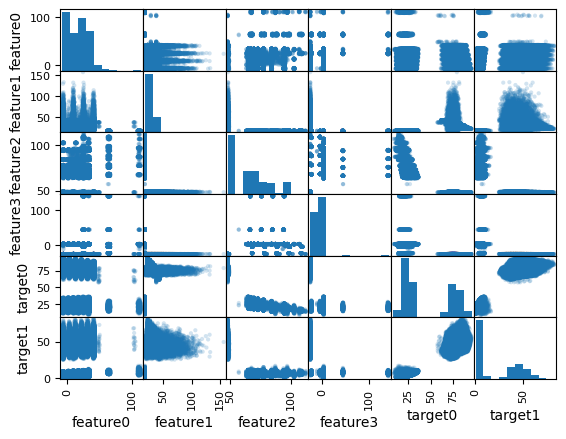

In [17]:
pd.plotting.scatter_matrix(train[[f"feature{n}" for n in range(4)] + ["target0", "target1"]], alpha=0.2)

array([[<Axes: xlabel='feature4', ylabel='feature4'>,
        <Axes: xlabel='feature5', ylabel='feature4'>,
        <Axes: xlabel='feature6', ylabel='feature4'>,
        <Axes: xlabel='feature7', ylabel='feature4'>,
        <Axes: xlabel='target0', ylabel='feature4'>,
        <Axes: xlabel='target1', ylabel='feature4'>],
       [<Axes: xlabel='feature4', ylabel='feature5'>,
        <Axes: xlabel='feature5', ylabel='feature5'>,
        <Axes: xlabel='feature6', ylabel='feature5'>,
        <Axes: xlabel='feature7', ylabel='feature5'>,
        <Axes: xlabel='target0', ylabel='feature5'>,
        <Axes: xlabel='target1', ylabel='feature5'>],
       [<Axes: xlabel='feature4', ylabel='feature6'>,
        <Axes: xlabel='feature5', ylabel='feature6'>,
        <Axes: xlabel='feature6', ylabel='feature6'>,
        <Axes: xlabel='feature7', ylabel='feature6'>,
        <Axes: xlabel='target0', ylabel='feature6'>,
        <Axes: xlabel='target1', ylabel='feature6'>],
       [<Axes: xlabel='feature4

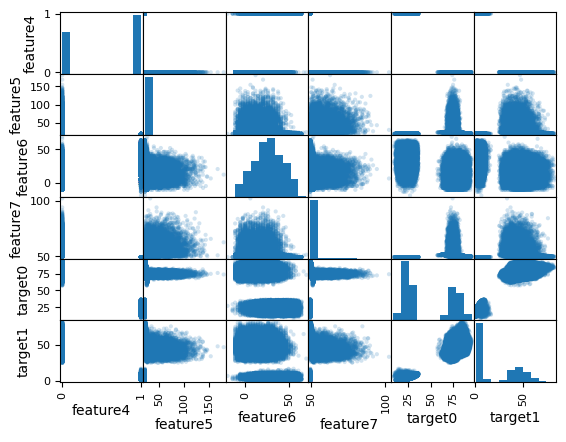

In [21]:
pd.plotting.scatter_matrix(train[[f"feature{n}" for n in range(4,8)] + ["target0", "target1"]], alpha=0.2)

array([[<Axes: xlabel='feature9', ylabel='feature9'>,
        <Axes: xlabel='feature10', ylabel='feature9'>,
        <Axes: xlabel='feature11', ylabel='feature9'>,
        <Axes: xlabel='feature12', ylabel='feature9'>,
        <Axes: xlabel='target0', ylabel='feature9'>,
        <Axes: xlabel='target1', ylabel='feature9'>],
       [<Axes: xlabel='feature9', ylabel='feature10'>,
        <Axes: xlabel='feature10', ylabel='feature10'>,
        <Axes: xlabel='feature11', ylabel='feature10'>,
        <Axes: xlabel='feature12', ylabel='feature10'>,
        <Axes: xlabel='target0', ylabel='feature10'>,
        <Axes: xlabel='target1', ylabel='feature10'>],
       [<Axes: xlabel='feature9', ylabel='feature11'>,
        <Axes: xlabel='feature10', ylabel='feature11'>,
        <Axes: xlabel='feature11', ylabel='feature11'>,
        <Axes: xlabel='feature12', ylabel='feature11'>,
        <Axes: xlabel='target0', ylabel='feature11'>,
        <Axes: xlabel='target1', ylabel='feature11'>],
       [<A

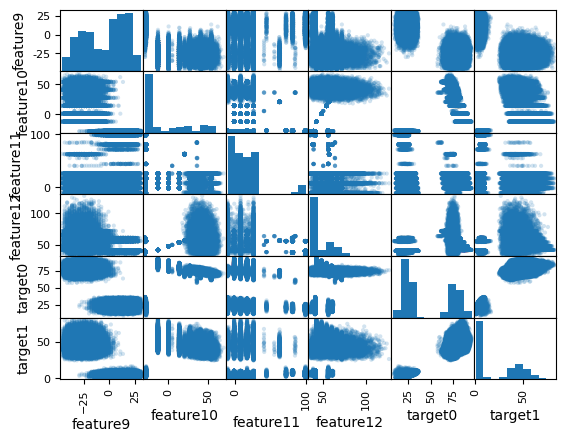

In [22]:
pd.plotting.scatter_matrix(train[[f"feature{n}" for n in range(9,13)] + ["target0", "target1"]], alpha=0.2)

array([[<Axes: xlabel='feature14', ylabel='feature14'>,
        <Axes: xlabel='feature15', ylabel='feature14'>,
        <Axes: xlabel='feature16', ylabel='feature14'>,
        <Axes: xlabel='feature17', ylabel='feature14'>,
        <Axes: xlabel='target0', ylabel='feature14'>,
        <Axes: xlabel='target1', ylabel='feature14'>],
       [<Axes: xlabel='feature14', ylabel='feature15'>,
        <Axes: xlabel='feature15', ylabel='feature15'>,
        <Axes: xlabel='feature16', ylabel='feature15'>,
        <Axes: xlabel='feature17', ylabel='feature15'>,
        <Axes: xlabel='target0', ylabel='feature15'>,
        <Axes: xlabel='target1', ylabel='feature15'>],
       [<Axes: xlabel='feature14', ylabel='feature16'>,
        <Axes: xlabel='feature15', ylabel='feature16'>,
        <Axes: xlabel='feature16', ylabel='feature16'>,
        <Axes: xlabel='feature17', ylabel='feature16'>,
        <Axes: xlabel='target0', ylabel='feature16'>,
        <Axes: xlabel='target1', ylabel='feature16'>],
 

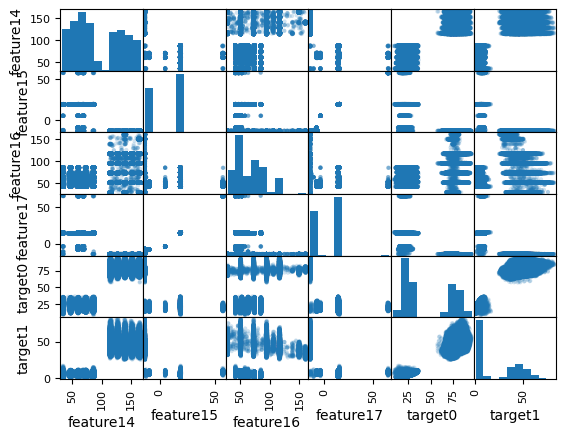

In [23]:
pd.plotting.scatter_matrix(train[[f"feature{n}" for n in range(14,18)] + ["target0", "target1"]], alpha=0.2)

array([[<Axes: xlabel='feature19', ylabel='feature19'>,
        <Axes: xlabel='feature20', ylabel='feature19'>,
        <Axes: xlabel='feature21', ylabel='feature19'>,
        <Axes: xlabel='feature22', ylabel='feature19'>,
        <Axes: xlabel='feature23', ylabel='feature19'>,
        <Axes: xlabel='feature24', ylabel='feature19'>,
        <Axes: xlabel='target0', ylabel='feature19'>,
        <Axes: xlabel='target1', ylabel='feature19'>],
       [<Axes: xlabel='feature19', ylabel='feature20'>,
        <Axes: xlabel='feature20', ylabel='feature20'>,
        <Axes: xlabel='feature21', ylabel='feature20'>,
        <Axes: xlabel='feature22', ylabel='feature20'>,
        <Axes: xlabel='feature23', ylabel='feature20'>,
        <Axes: xlabel='feature24', ylabel='feature20'>,
        <Axes: xlabel='target0', ylabel='feature20'>,
        <Axes: xlabel='target1', ylabel='feature20'>],
       [<Axes: xlabel='feature19', ylabel='feature21'>,
        <Axes: xlabel='feature20', ylabel='feature21'>

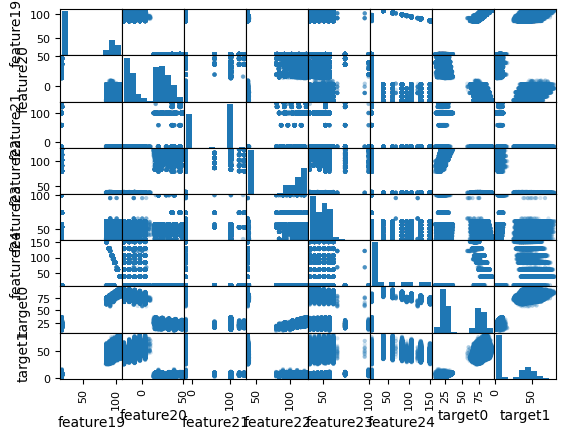

In [25]:
pd.plotting.scatter_matrix(train[[f"feature{n}" for n in range(19,25)] + ["target0", "target1"]], alpha=0.2)

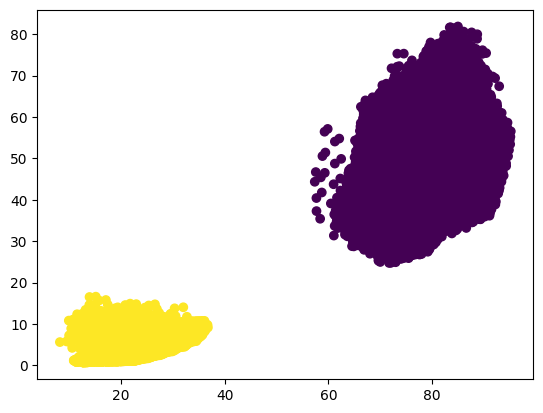

In [32]:
train["cluster"] = (train["feature4"] == 1) * 1
plt.scatter(train["target0"], train["target1"], c=train["cluster"])
plt.show()

<Axes: >

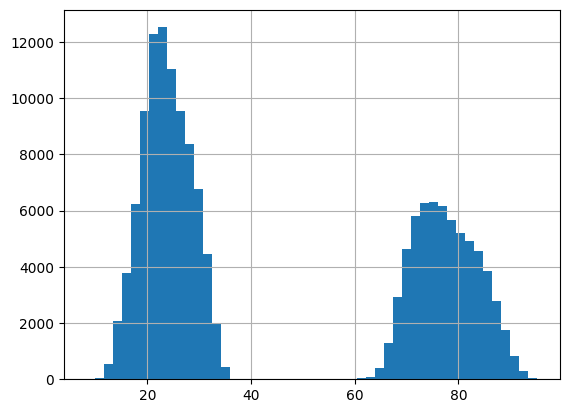

In [36]:
train["target0"].hist(bins=50)

In [40]:
train["cluster"].value_counts()

cluster
1    89567
0    63850
Name: count, dtype: int64